# RNN ( 순환신경망 )


1. 출력이 다음 입력에도 전달된다.
 - 과거의 정보를 가지고 있다.

2. 입력과 출력의 길이에 제한이 없다.
 - 다양한 형태의 네트워크를 만들 수 있다.
 1. 이미지 설명 생성
 2. 감성분석
 3. 번역


## SimpleRNN, LSTM, GRU 사용

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x = []
y = []

for i in range(6):
  lst = list(range(i, i+4))
  
  x.append(list(map(lambda c: [c / 10], lst)))
  y.append((i+4) / 10)

x = np.array(x)
y = np.array(y)

for i in range(len(x)):
  print(x[i], y[i])

[[0. ]
 [0.1]
 [0.2]
 [0.3]] 0.4
[[0.1]
 [0.2]
 [0.3]
 [0.4]] 0.5
[[0.2]
 [0.3]
 [0.4]
 [0.5]] 0.6
[[0.3]
 [0.4]
 [0.5]
 [0.6]] 0.7
[[0.4]
 [0.5]
 [0.6]
 [0.7]] 0.8
[[0.5]
 [0.6]
 [0.7]
 [0.8]] 0.9


In [ ]:
# SimpleRNN을 이용한 모델 생성
# return_sequences는 레이어의 출력을 다음레이어에 그대로 전해준다.
model = tf.keras.Sequential([
                             tf.keras.layers.SimpleRNN(units=10, return_sequences=False, input_shape=[4, 1]),
                             tf.keras.layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mse'
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 10)                120       
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x, y, epochs=100, verbose=0)
print(model.predict(x))

[[0.37474412]
 [0.5080441 ]
 [0.62512445]
 [0.72319984]
 [0.8017925 ]
 [0.8623246 ]]


In [ ]:
print(model.predict(np.array( [[[0.6], [0.7], [0.8], [0.9]]] )))

[[0.90744716]]


In [ ]:
x = []
y = []
for i in range(3000):
  lst = np.random.rand(100)
  idx = np.random.choice(100, 2, replace=False)

  zeros = np.zeros(100)
  zeros[idx] = 1

  x.append(np.array(list(zip(zeros, lst))))
  y.append(np.prod(lst[idx]))

print(x[0], y[0])

[[0.         0.2739675 ]
 [0.         0.08146391]
 [0.         0.58060523]
 [0.         0.35059502]
 [0.         0.90300895]
 [0.         0.29435937]
 [0.         0.00136336]
 [0.         0.58454687]
 [0.         0.47511529]
 [0.         0.52322035]
 [0.         0.32054976]
 [0.         0.6419495 ]
 [0.         0.09851348]
 [0.         0.44482505]
 [0.         0.44615207]
 [0.         0.37874057]
 [0.         0.66530123]
 [0.         0.48733291]
 [0.         0.90641836]
 [0.         0.12164629]
 [0.         0.04445513]
 [0.         0.96632904]
 [0.         0.72348829]
 [0.         0.40276738]
 [0.         0.53673137]
 [0.         0.85931506]
 [0.         0.20387095]
 [0.         0.46554737]
 [0.         0.7348859 ]
 [0.         0.07699978]
 [0.         0.37770376]
 [0.         0.38097996]
 [0.         0.92539922]
 [0.         0.60876149]
 [0.         0.08242823]
 [0.         0.95838524]
 [0.         0.5680192 ]
 [0.         0.50966347]
 [0.         0.69060695]
 [0.         0.79560967]


In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.SimpleRNN(units=30, return_sequences=True, input_shape=[100, 2]),
                             tf.keras.layers.SimpleRNN(units=30),
                             tf.keras.layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mse'
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 100, 30)           990       
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 30)                1830      
_________________________________________________________________
dense (Dense)                (None, 1)                 31        
Total params: 2,851
Trainable params: 2,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x = np.array(x)
y = np.array(y)

In [ ]:
history = model.fit(x[:2560], y[:2560], epochs=100, validation_split=0.25)

Epoch 1/100
60/60 [==============================] - 5s 89ms/step - loss: 0.0616 - val_loss: 0.0478
Epoch 2/100
60/60 [==============================] - 6s 92ms/step - loss: 0.0488 - val_loss: 0.0470
Epoch 3/100
60/60 [==============================] - 5s 82ms/step - loss: 0.0475 - val_loss: 0.0478
Epoch 4/100
60/60 [==============================] - 5s 86ms/step - loss: 0.0483 - val_loss: 0.0475
Epoch 5/100
60/60 [==============================] - 5s 91ms/step - loss: 0.0496 - val_loss: 0.0482
Epoch 6/100
60/60 [==============================] - 5s 91ms/step - loss: 0.0472 - val_loss: 0.0480
Epoch 7/100
60/60 [==============================] - 5s 89ms/step - loss: 0.0474 - val_loss: 0.0475
Epoch 8/100
60/60 [==============================] - 6s 92ms/step - loss: 0.0472 - val_loss: 0.0474
Epoch 9/100
60/60 [==============================] - 5s 88ms/step - loss: 0.0486 - val_loss: 0.0500
Epoch 10/100
60/60 [==============================] - 5s 88ms/step - loss: 0.0471 - val_loss: 0.0471

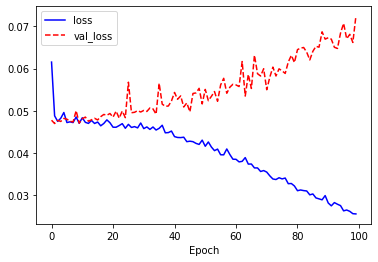

In [ ]:
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
model.evaluate(x[2560:], y[2560:])

prediction = model.predict(x[2560:2560+5])

14/14 [==============================] - 0s 14ms/step - loss: 0.0764


In [ ]:
for i in range(5):
  print(y[2560+i], '\t', prediction[i][0], '\tdiff: ', abs(prediction[i][0] - y[2560+i]))

0.694565818710646 	 0.26024383 	diff:  0.4343219856456131
0.02584840857655841 	 0.17622483 	diff:  0.15037641918986006
0.11875224597483654 	 0.19935119 	diff:  0.08059894554585438
0.00021711743749638118 	 0.3587558 	diff:  0.3585386797102545
0.7094580186603336 	 0.3300556 	diff:  0.37940242421605874


In [ ]:
prediction = model.predict(x[2560:])
fail = 0

for i in range(len(prediction)):
  if abs(prediction[i][0] - y[2560+i]) > 0.04:
    fail += 1

print('correctness: ', (440 - fail) / 440 * 100, '%')

correctness:  9.772727272727273 %


In [ ]:
# LSTM 모델 생성
model = tf.keras.Sequential([
                             tf.keras.layers.LSTM(units=30, return_sequences=True, input_shape=[100, 2]),
                             tf.keras.layers.LSTM(units=30),
                             tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 30)           3960      
_________________________________________________________________
lstm_1 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 11,311
Trainable params: 11,311
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x = np.array(x)
y = np.array(y)

In [ ]:
history = model.fit(x[:2560], y[:2560], epochs=100, validation_split=0.2)

Epoch 1/100
64/64 [==============================] - 1s 19ms/step - loss: 0.0493 - val_loss: 0.0470
Epoch 2/100
64/64 [==============================] - 1s 11ms/step - loss: 0.0469 - val_loss: 0.0473
Epoch 3/100
64/64 [==============================] - 1s 10ms/step - loss: 0.0470 - val_loss: 0.0472
Epoch 4/100
64/64 [==============================] - 1s 10ms/step - loss: 0.0469 - val_loss: 0.0467
Epoch 5/100
64/64 [==============================] - 1s 11ms/step - loss: 0.0470 - val_loss: 0.0485
Epoch 6/100
64/64 [==============================] - 1s 10ms/step - loss: 0.0471 - val_loss: 0.0467
Epoch 7/100
64/64 [==============================] - 1s 10ms/step - loss: 0.0471 - val_loss: 0.0472
Epoch 8/100
64/64 [==============================] - 1s 10ms/step - loss: 0.0468 - val_loss: 0.0481
Epoch 9/100
64/64 [==============================] - 1s 10ms/step - loss: 0.0470 - val_loss: 0.0467
Epoch 10/100
64/64 [==============================] - 1s 11ms/step - loss: 0.0468 - val_loss: 0.0489

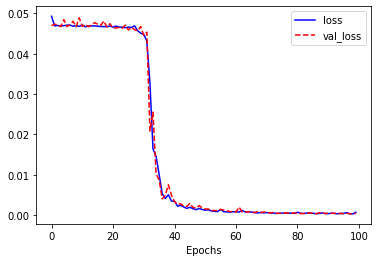

In [ ]:
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epochs')
plt.legend()

plt.show()


In [ ]:
model.evaluate(x[2560:], y[2560:])

14/14 [==============================] - 0s 6ms/step - loss: 3.8110e-04


0.0003810951311606914

In [ ]:
prediction = model.predict(x[2560:2560+5])

for i in range(5):
  print(y[2560+i], '\t', prediction[i][0], '\tdiff: ', abs(prediction[i][0] - y[2560+i]))

0.694565818710646 	 0.6686788 	diff:  0.025886998577436815
0.02584840857655841 	 0.04175548 	diff:  0.015907070252587023
0.11875224597483654 	 0.15929231 	diff:  0.04054006450146656
0.00021711743749638118 	 0.09006498 	diff:  0.08984786265216808
0.7094580186603336 	 0.6801843 	diff:  0.029273713946130764


In [ ]:
prediction = model.predict(x[2560:])
cnt = 0

for i in range(len(prediction)):
  if abs(prediction[i][0] - y[2560+i]) > 0.04:
    cnt += 1

print('correctness: ', (440 - cnt) / 440 * 100, '%')

correctness:  94.77272727272728 %


In [ ]:
# GRU 모델 생성

model = tf.keras.Sequential([
                             tf.keras.layers.GRU(units=30, return_sequences=True, input_shape=[100, 2]),
                             tf.keras.layers.GRU(units=30),
                             tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 100, 30)           3060      
_________________________________________________________________
gru_1 (GRU)                  (None, 30)                5580      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 8,671
Trainable params: 8,671
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x = np.array(x)
y = np.array(y)

In [ ]:
history = model.fit(x[:2560], y[:2560], epochs=100, validation_split=0.2)

Epoch 1/100
64/64 [==============================] - 1s 18ms/step - loss: 0.0480 - val_loss: 0.0481
Epoch 2/100
64/64 [==============================] - 1s 10ms/step - loss: 0.0471 - val_loss: 0.0471
Epoch 3/100
64/64 [==============================] - 1s 10ms/step - loss: 0.0477 - val_loss: 0.0517
Epoch 4/100
64/64 [==============================] - 1s 10ms/step - loss: 0.0481 - val_loss: 0.0475
Epoch 5/100
64/64 [==============================] - 1s 11ms/step - loss: 0.0468 - val_loss: 0.0471
Epoch 6/100
64/64 [==============================] - 1s 10ms/step - loss: 0.0470 - val_loss: 0.0471
Epoch 7/100
64/64 [==============================] - 1s 10ms/step - loss: 0.0470 - val_loss: 0.0470
Epoch 8/100
64/64 [==============================] - 1s 10ms/step - loss: 0.0471 - val_loss: 0.0477
Epoch 9/100
64/64 [==============================] - 1s 10ms/step - loss: 0.0468 - val_loss: 0.0468
Epoch 10/100
64/64 [==============================] - 1s 10ms/step - loss: 0.0470 - val_loss: 0.0471

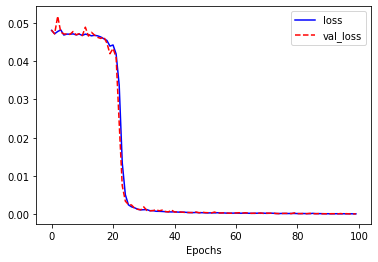

In [ ]:
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [ ]:
model.evaluate(x[2560:], y[2560:])

14/14 [==============================] - 0s 6ms/step - loss: 1.0867e-04


0.0001086670090444386

In [ ]:
prediction = model.predict(x[2560:])
cnt = 0

for i in range(len(prediction)):
  if abs(prediction[i][0] - y[2560+i]) > 0.04:
    cnt += 1

print('correctness: ', (440 - cnt) / 440 * 100, '%')

correctness:  99.77272727272727 %


# 감성분석

In [ ]:
import re

In [ ]:
path_train_file = tf.keras.utils.get_file('train_txt', 'https://raw.githubusercontent.com/e9t/nsmc/eafdd77e310f399a4d0083a58ade40b55a5a308d/ratings_train.txt')
path_test_file = tf.keras.utils.get_file('test_txt', 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt')

In [ ]:
train_txt = open(path_train_file, 'rb').read().decode(encoding='utf8')
test_txt = open(path_test_file, 'rb').read().decode(encoding='utf8')

In [ ]:
print(len(train_txt))
print(len(test_txt))

6937271
2318260


In [ ]:
print(train_txt[:300])

id	document	label
9976970	아 더빙.. 진짜 짜증나네요 목소리	0
3819312	흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나	1
10265843	너무재밓었다그래서보는것을추천한다	0
9045019	교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정	0
6483659	사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다	1
5403919	막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.	0
7797314	원작의


In [ ]:
train_y = np.array([[int(row.split('\t')[2])] for row in train_txt.split('\n')[1:] if row.count('\t') > 0])
test_y = np.array([[int(row.split('\t')[2])] for row in test_txt.split('\n')[1:] if row.count('\t') > 0])

In [ ]:
train_y[:5]

array([[0],
       [1],
       [0],
       [0],
       [1]])

In [ ]:
def clean_str(string):
    string = re.sub(r"[\.!?\'\`]+", " ", string)
    string = re.sub(r"\'s", " \'s", string) 
    string = re.sub(r"\'ve", " \'ve", string) 
    string = re.sub(r"n\'t", " n\'t", string) 
    string = re.sub(r"\'re", " \'re", string) 
    string = re.sub(r"\'d", " \'d", string) 
    string = re.sub(r"\'ll", " \'ll", string) 
    string = re.sub(r",", " , ", string) 
    string = re.sub(r"!", " ! ", string) 
    string = re.sub(r"\(", " \( ", string) 
    string = re.sub(r"\)", " \) ", string) 
    string = re.sub(r"\?", " \? ", string) 
    string = re.sub(r"\s{2,}", " ", string)    
    string = re.sub(r"\'{2,}", "\'", string)
    string = re.sub(r"\'", "", string)

    return string.lower()


In [ ]:
train_text_x = [row.split("\t")[1] for row in train_txt.split("\n")[1:] if row.count("\t") > 0]
train_text_x = [clean_str(sentence) for sentence in train_text_x]

In [ ]:
sentences = [sentence.split(' ') for sentence in train_text_x]

In [ ]:
for i in range(5):
  print(sentences[i])

['아', '더빙', '진짜', '짜증나네요', '목소리']
['흠', '포스터보고', '초딩영화줄', '오버연기조차', '가볍지', '않구나']
['너무재밓었다그래서보는것을추천한다']
['교도소', '이야기구먼', '솔직히', '재미는', '없다', '평점', '조정']
['사이몬페그의', '익살스런', '연기가', '돋보였던', '영화', '스파이더맨에서', '늙어보이기만', '했던', '커스틴', '던스트가', '너무나도', '이뻐보였다']


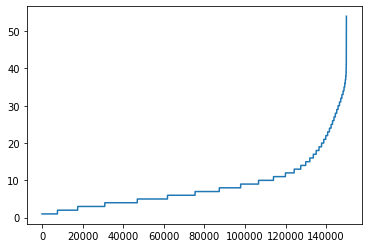

In [ ]:
# 학습을 시키기 위해선 각 문장의 길이가 비슷해야함.
# 문장의 길이를 확인하기 위한 그래프 출력
# 문장은 총 약 15만개
# 길이가 대부분 40 미만
sentence_len = [len(sentence) for sentence in sentences]
sentence_len.sort()

plt.plot(sentence_len)
plt.show()

In [ ]:
# 1. 문장의 길이를 25로 설정
# 25보다 긴것은 생략. 25보다 짧은 것은 패딩으로 25로 만듦
# 2. 단어의 최대길이 5로 설정
# 여러개의 단어로 분산될 수 있는 의미를 하나로 모아준다.

sentences_new = []
for sentence in sentences:
  sentences_new.append([word[:5] for word in sentence[:25]])

In [ ]:
sentences = sentences_new

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(sentences)

train_x = tokenizer.texts_to_sequences(sentences)
# pad_sequences 의 padding에는 두 가지 인자가 있다. pre, post
# pre는 문장의 앞에 패딩을 넣고, post는 문장의 뒤에 패딩을 넣는다.
train_x = pad_sequences(train_x, padding='post')

print(train_x[:5])

[[   28   920     6  5773  1123     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [  647  6047  7009     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [   73   356    29    34 10401     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [  109  5288     3  2159   894   574     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]]


In [ ]:
# 모델을 생성
# 임베딩 레이어와 LSTM 레이어를 연결한 뒤
# Dense 레이어의 softmax 활성함수로 긍정 / 부정을 분류
# 분류문제에서는 categorical_crossentropy를 사용.
# 정답인 y가 희소행렬일 때는 sparse_categorical_crossentropy를 사용.

model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(20000, 100, input_length=25),
                             tf.keras.layers.LSTM(units=128),
                             tf.keras.layers.Dense(2, activation='sigmoid')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 25, 100)           2000000   
_________________________________________________________________
lstm_5 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 258       
Total params: 2,117,506
Trainable params: 2,117,506
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(train_x, train_y, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5
938/938 [==============================] - 21s 22ms/step - loss: 0.4549 - accuracy: 0.7676 - val_loss: 0.4017 - val_accuracy: 0.8075
Epoch 2/5
938/938 [==============================] - 20s 21ms/step - loss: 0.3460 - accuracy: 0.8363 - val_loss: 0.3958 - val_accuracy: 0.8125
Epoch 3/5
938/938 [==============================] - 20s 22ms/step - loss: 0.3032 - accuracy: 0.8531 - val_loss: 0.4293 - val_accuracy: 0.8103
Epoch 4/5
938/938 [==============================] - 20s 22ms/step - loss: 0.2661 - accuracy: 0.8686 - val_loss: 0.4979 - val_accuracy: 0.8059
Epoch 5/5
938/938 [==============================] - 20s 21ms/step - loss: 0.2352 - accuracy: 0.8812 - val_loss: 0.4885 - val_accuracy: 0.8041


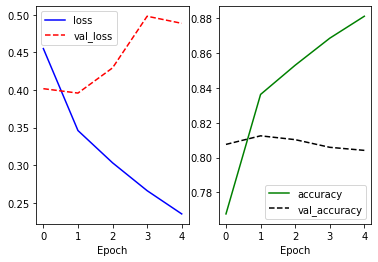

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [ ]:
test_txt_x = [row.split('\t')[1] for row in test_txt.split('\n')[1:] if row.count('\t') > 0]
test_txt_x = [clean_str(sentence) for sentence in test_txt_x]
sentences = [sentence.split(' ') for sentence in test_txt_x]

sentences_new = []
for sentence in sentences:
  sentences_new.append([word[:5] for word in sentence[:25]])
sentences = sentences_new

In [ ]:
sentences

[['굳', 'ㅋ'],
 ['gdnto'],
 ['뭐야', '이', '평점들은', '나쁘진', '않지만', '10점', '짜리는', '더더욱', '아니잖아'],
 ['지루하지는', '않은데', '완전', '막장임', '돈주고', '보기에는', ''],
 ['3d만',
  '아니었어도',
  '별',
  '다섯',
  '개',
  '줬을텐데',
  '왜',
  '3d로',
  '나와서',
  '제',
  '심기를',
  '불편하게',
  '하죠',
  ''],
 ['음악이', '주가', '된', ',', '최고의', '음악영화'],
 ['진정한', '쓰레기'],
 ['마치', '미국애니에', '튀어나온듯', '창의력없는', '로봇디자인', ',', '고개를', '젖게한다'],
 ['갈수록',
  '개판되가는',
  '중국영화',
  '유치하고',
  '내용없음',
  '폼잡다',
  '끝남',
  '말도안되는',
  '무기에',
  '유치한cg',
  '아',
  '그립다',
  '동사서독같',
  '영화가',
  '이건',
  '3류아류작'],
 ['이별의',
  '아픔뒤에',
  '찾아오는',
  '새로운',
  '인연의',
  '기쁨',
  'but',
  ',',
  '모든',
  '사람이',
  '그렇지는',
  '않네',
  ''],
 ['괜찮네요오'],
 ['한국독립영', '한계', '그렇게', '아버지가', '된다와', '비교됨'],
 ['청춘은',
  '아름답다',
  '그',
  '아름다움은',
  '이성을',
  '흔들어',
  '놓는다',
  '찰나의',
  '아름다움을',
  '잘',
  '포착한',
  '섬세하고',
  '아름다운',
  '수채화같은',
  '퀴어영화이',
  ''],
 ['눈에', '보이는', '반전이었지', '영화의', '흡인력은', '사라지지', '않았다', ''],
 ['"""스토',
  ',',
  '연출',
  ',',
  '연기',
  ',',
  '비주얼',
  '등',
  '영화의',
  '기본',
  '

In [ ]:
test_x = tokenizer.texts_to_sequences(sentences)
test_x = pad_sequences(test_x, padding='post')

In [ ]:
model.evaluate(test_x, test_y, verbose=0)

[0.49544453620910645, 0.7985000014305115]

In [ ]:
test_sentence = ""
test_sentence = test_sentence.split(' ')

test_sentences = []
now_sentences = []
for word in test_sentence:
  now_sentences.append(word)
  test_sentences.append(now_sentences[:])

test_x_1 = tokenizer.texts_to_sequences(test_sentences)
test_x_1 = pad_sequences(test_x_1, maxlen=25, padding='post')

In [ ]:
prediction = model.predict(test_x_1)

In [ ]:
for idx, sentence in enumerate(test_sentences):
  print(sentence)
  print(prediction[idx])

['재미없다.']
[0.4834803 0.5165197]
['재미없다.', '다신']
[0.5740007  0.42599934]
['재미없다.', '다신', '안봐야지']
[0.50381076 0.49618924]
